# Machine Learning-Youtube Views Prediction

**Objective**<br>
* Build model to predict video views based on statistical numbers and other attributes.

**About dataset**
* This dataset is obtained from [Trending YouTube Video Statistics | Kaggle](https://www.kaggle.com/datasnaek/youtube-new)

**Main Instructions**
* Exploratory analysis from the data, create some visualization to describe the data
* Describe the pre-processing steps, also the reason behind them
* Split the data into training and testing with optional portion
* Build the models with matching hyperparameter tune, choose the best model, also the reason behind that
* Test the model with data test

In [2]:
#Make Necessary Import
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import over_sampling

sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


# Load and Describe Data

## Load Data

In [112]:
data = pd.read_csv('/content/youtube_statistics.csv', sep=',')
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [113]:
print('There are',str(len(data)), 'rows in this dataset')

There are 40949 rows in this dataset


## Describe Data

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

**Conclusion**</br>
* Dataframe have 15 columns
* Dataframe have 40949 rows
* Total categorical columns are 10 columns
* Total numerical columns are 5 columns
* `views` column is the target for this dataset

# Exploratory Data Analysis

## Statistical Summary

### Separation of Categorical and Numerical Data

In [115]:
cats = ['trending_date','title','channel_title','publish_time','tags','comments_disabled','ratings_disabled','video_error_or_removed',
       'description']
nums = ['category_id','views','likes','dislikes','comment_count']

### Statistical Numerical Data

In [116]:
data[nums].describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


**Conclusion from Statistical Numerical Data**<br>

* The distribution of data for feature `views`, `likes`, `dislikes`, `comment_count`looks skewed *(mean & median are not close enough)*

### Statistical Categorical Data

In [117]:
data[cats].describe()

,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40949,40949,40949,40949,40949,40949,40949,40949,40379
unique,205,6455,2207,6269,6055,2,2,2,6901
top,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,200,30,203,50,1535,40316,40780,40926,58


## Graphical Approaching

### Univariate Analysis

In [118]:
# assign the numerical data into nums object
numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
display(data.select_dtypes(include=numerics).columns)
print(data.select_dtypes(include=numerics).shape)
data_num = data.select_dtypes(include=numerics)
data_num.head(3)

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count'], dtype='object')

(40949, 5)


,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181


In [119]:
# assign the categorical data into cats object
display(data.select_dtypes(include=['object']).columns)
print(data.select_dtypes(include=object).shape)
data_cat = data.select_dtypes(include=['object'])
data_cat.head(3)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'publish_time',
       'tags', 'thumbnail_link', 'description'],
      dtype='object')

(40949, 8)


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,SHANtell martin,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


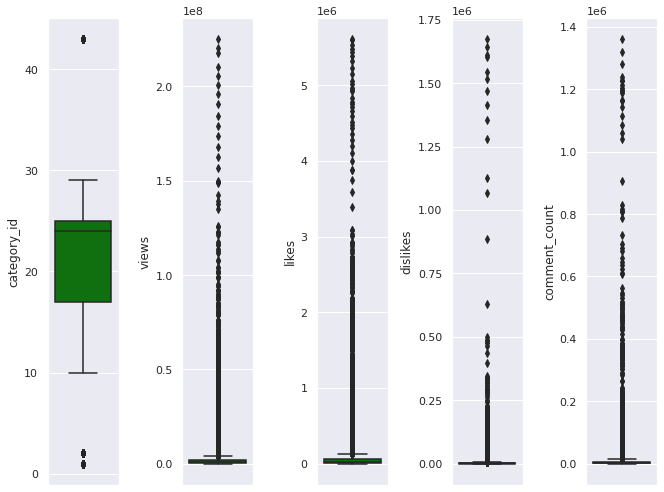

In [120]:
# look at the distribution of data with boxplot
features = ['category_id','views','likes','dislikes','comment_count']
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=data[features[i]],color='green',orient='v')
    plt.tight_layout();
#plt.savefig('fig/boxplot.png')

It can be seen in the boxplot graph above that the `view`, `likes`, `dislikes`, `comment_count` features have many outliers so that logarithmic transformations are needed for these features.

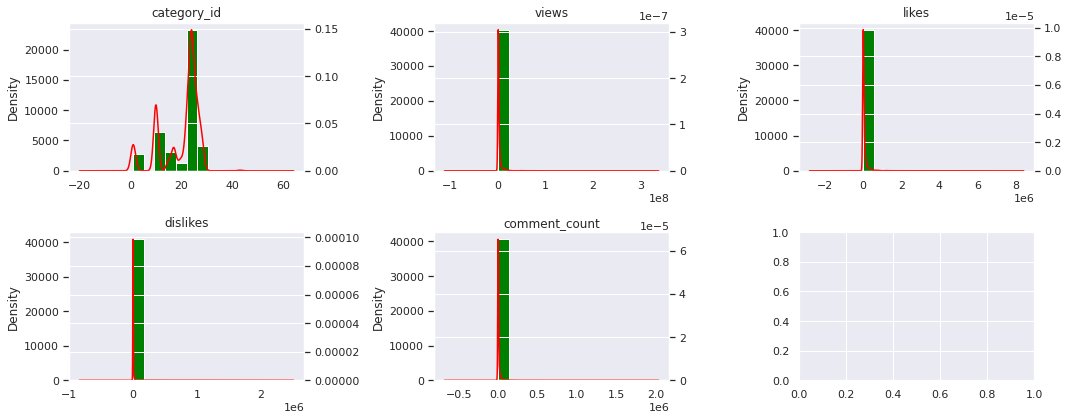

In [121]:
#View data distribution
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout();
#plt.savefig('fig/distribusi data.png')

In the data distribution of numerical features, it can be seen that there are several features that are positively skewed.

In [122]:
#look for unique values from each categorical data
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['fitur', 'unik nilai']
data_cat_unique = data_cat_unique.sort_values('unik nilai', ascending=False)
data_cat_unique

,fitur,unik nilai
7,description,6901
2,title,6455
6,thumbnail_link,6352
0,video_id,6282
4,publish_time,6269
5,tags,6055
3,channel_title,2207
1,trending_date,205


### Multivariate Analysis

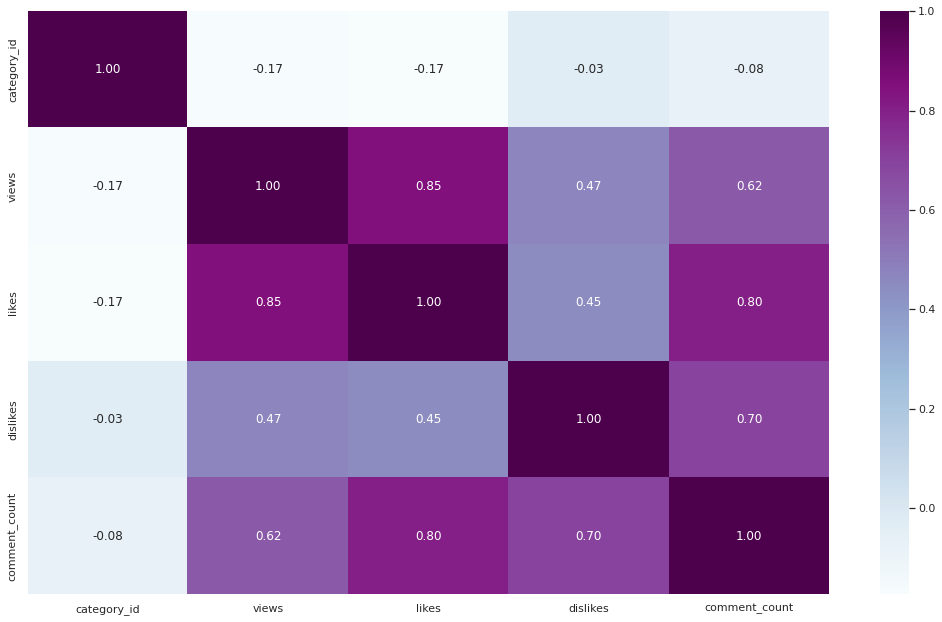

In [123]:
#create a correlation matrix from each numeric data
features = ['category_id','views','likes','dislikes','comment_count']
corr_= data[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");
#plt.savefig('fig/heatmap.png');

There are 3 features that have a strong positive correlation to `views`, namely the `likes`, `dislikes`, and `comment_count` features

<Figure size 720x576 with 0 Axes>

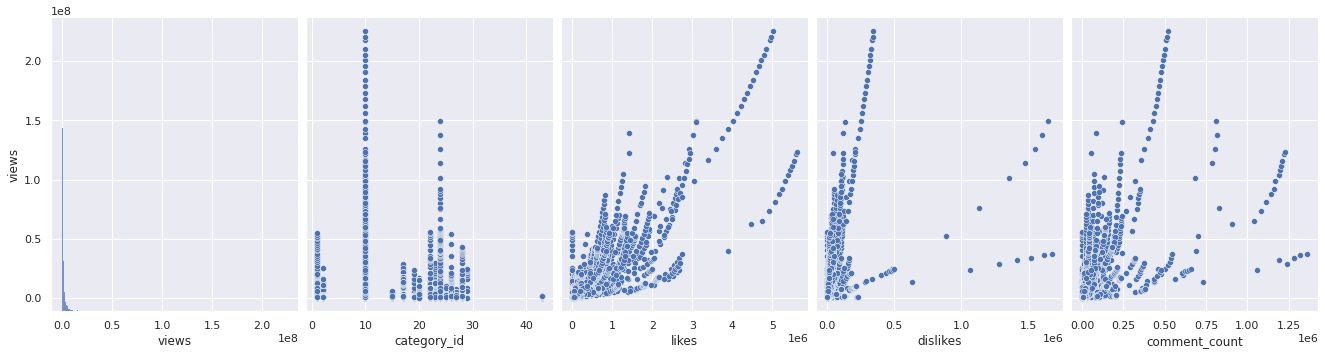

In [124]:
#create a pairplot graph from each numeric data
plt.figure(figsize=(10,8))
sns.pairplot(data=data, x_vars=['views','category_id','likes','dislikes','comment_count'], y_vars=['views'], height=5, aspect=0.75);
fig.tight_layout();
#plt.savefig('fig/pairplot.png')

**Simple EDA**

**In some boxplot charts it can be seen that the data distribution is uneven and has lots of outliers and it can also be seen that the data distribution on the `No_Tags.**

**Then when we look at the heatmap, we can see that there are several features that are positively correlated with the views of a video, such as `likes`, `dislikes`, `comment_count` so maybe some of these features are of feature importance for doing machine learning modeling**

# Data Preparation

In [125]:
#see the number of missing values from the data frame
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,video_id,0
1,trending_date,0
2,title,0
3,channel_title,0
4,category_id,0
5,publish_time,0
6,tags,0
7,views,0
8,likes,0
9,dislikes,0


In [126]:
#see the percentage of missing value for each feature
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,description,570,1.39


## Drop Column 


In [127]:
#dropping category_id, publish_date, description, tags, title, channel_title
data_clean = data.drop(['description','title','channel_title','tags','publish_time'], axis=1)

the `publish_time`, `publish_date`, `description`, `tags`, `title`, `channel_title` features are removed because they have a very large number of unique values, so it is assumed that each row of data has a different value.

## Filling Missing Column with Mode

In [128]:
data_clean['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

In [129]:
#fill in the comments_disabled value with mode
data_clean['comments_disabled'] = data_clean['comments_disabled'].fillna(data_clean['comments_disabled'].mode()[0])

In [130]:
data_clean['comments_disabled'].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

In [131]:
data_clean['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

In [132]:
#fill in the video_error_or_removed value with mode
data_clean['video_error_or_removed'] = data_clean['video_error_or_removed'].fillna(data_clean['video_error_or_removed'].mode()[0])

In [133]:
data_clean['video_error_or_removed'].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

In [134]:
data_clean['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

In [135]:
#fill in the ratings_disabled value with mode
data_clean['ratings_disabled'] = data_clean['ratings_disabled'].fillna(data_clean['ratings_disabled'].mode()[0])

In [136]:
data_clean['ratings_disabled'].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

## Filling Missing Column with Median


In [137]:
#fill in the missing value with median
data_clean.fillna(data_clean.median(), inplace=True)
data_clean.head(3)

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,22,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,1ZAPwfrtAFY,17.14.11,24,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,5qpjK5DgCt4,17.14.11,23,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False


In [138]:
data_clean.isnull().sum()

video_id                  0
trending_date             0
category_id               0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

## Duplicate Values

In [139]:
#see the number of duplicate data
data_clean.duplicated().sum()

48

In [140]:
#dropping duplicate data
data_clean = data_clean.drop_duplicates()

In [141]:
#see the number of duplicate data
data_clean.duplicated().sum()

0

## Outliers

Text(0.5, 0, '')

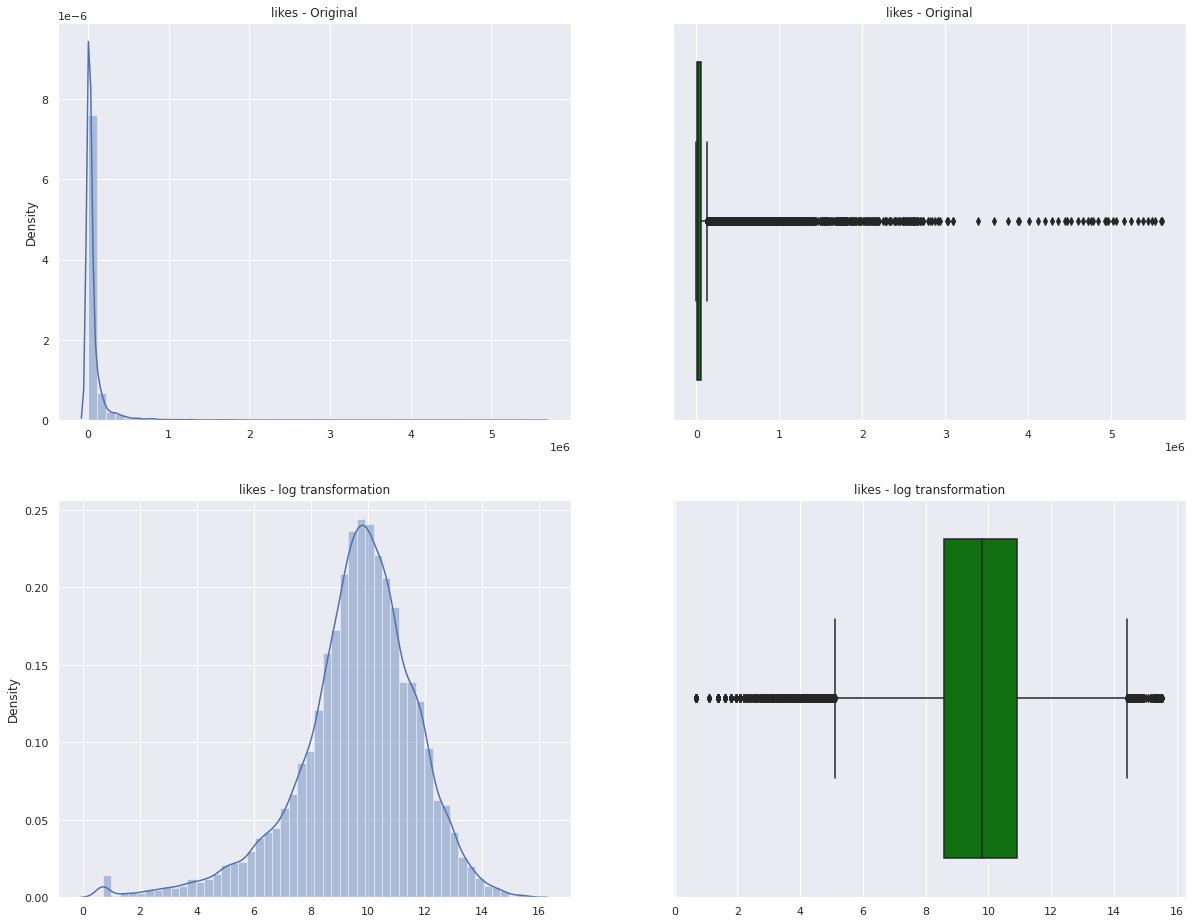

In [142]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['likes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('likes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['likes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('likes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['likes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('likes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['likes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('likes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

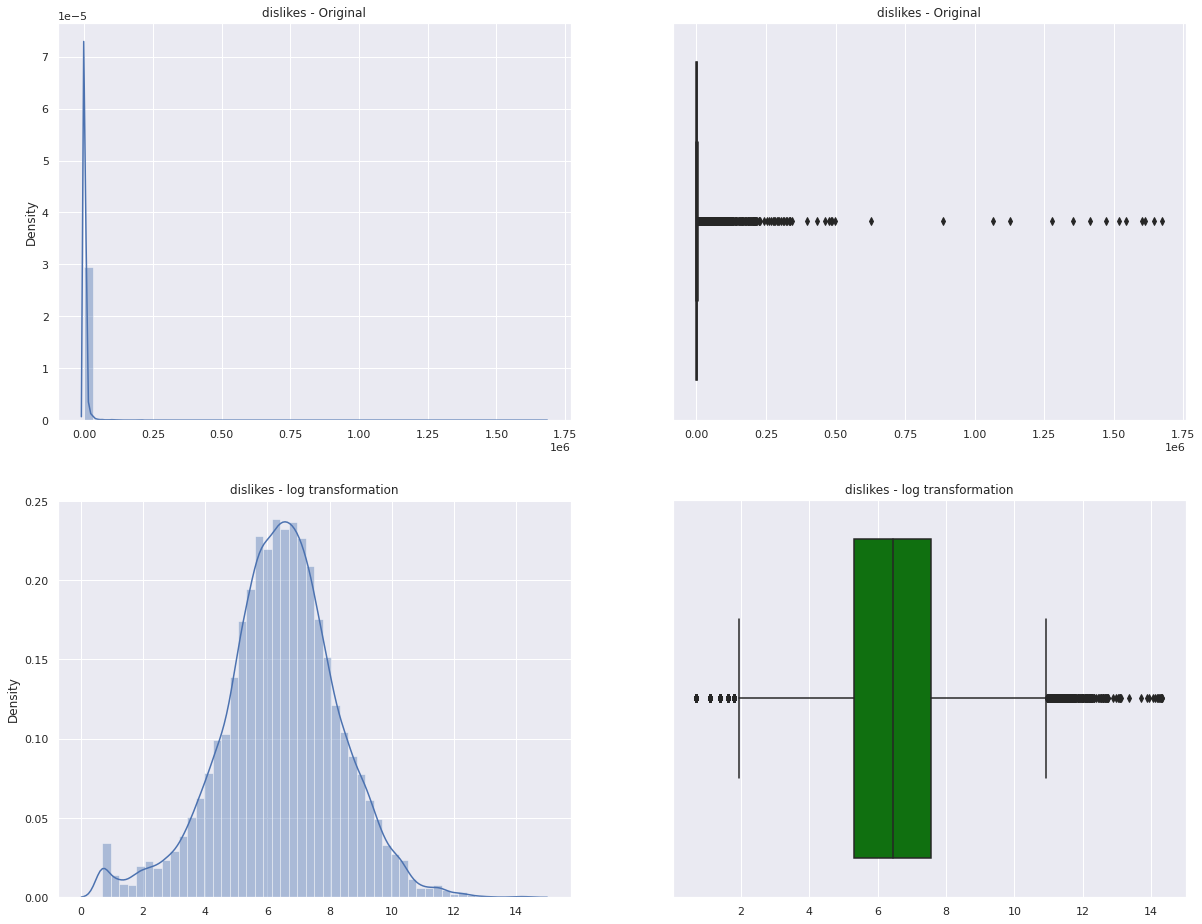

In [143]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['dislikes'],kde=True, ax=ax[0,0])
ax[0,0].set_title('dislikes - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['dislikes'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('dislikes - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['dislikes']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('dislikes - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['dislikes']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('dislikes - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

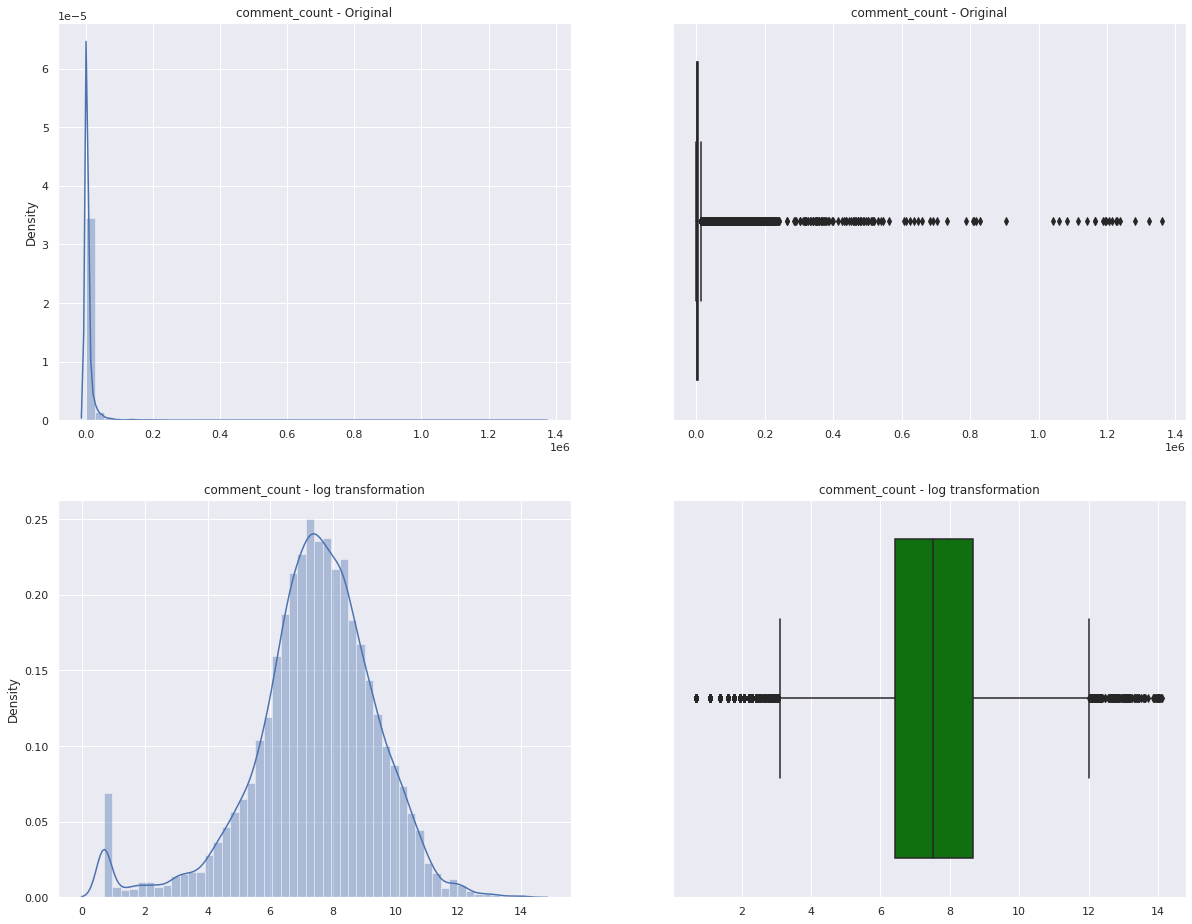

In [144]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['comment_count'],kde=True, ax=ax[0,0])
ax[0,0].set_title('comment_count - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['comment_count'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('comment_count - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['comment_count']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('comment_count - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['comment_count']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('comment_count - log transformation')
ax[1,1].set_xlabel('')

Text(0.5, 0, '')

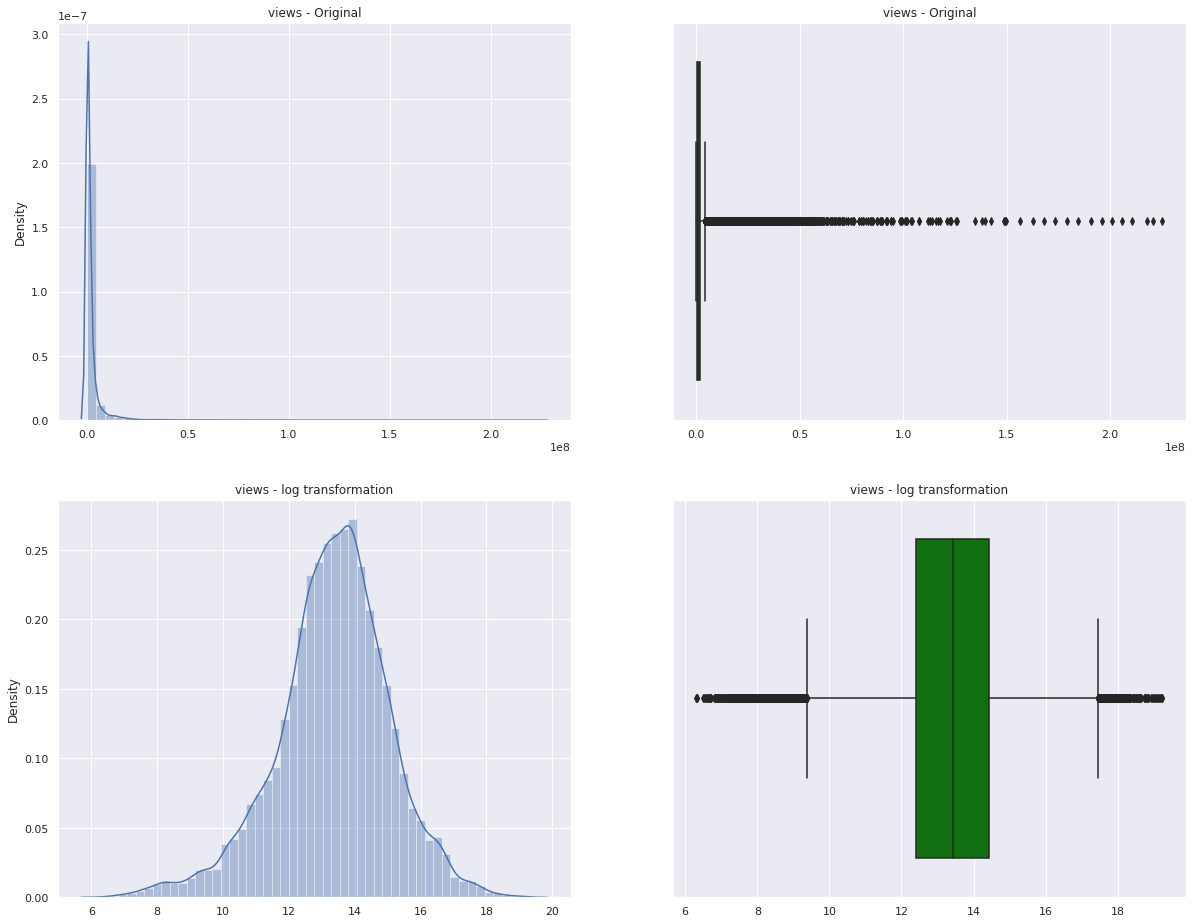

In [146]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_clean['views'],kde=True, ax=ax[0,0])
ax[0,0].set_title('views - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_clean['views'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('views - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_clean['views']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('views - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_clean['views']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('views - log transformation')
ax[1,1].set_xlabel('')

In [147]:
features = ['category_id','views','likes','dislikes','comment_count']

df_pre = data_clean.copy()
for var in features:
    df_pre['log_'+var]= (data_clean[var]+1).apply(np.log)

## Normalization

In [148]:
for var in features:
    df_pre['std_'+var]= MinMaxScaler().fit_transform(df_pre[var].values.reshape(len(df_pre), 1))

In [149]:
data_clean.describe()

,category_id,views,likes,dislikes,comment_count
count,40901.000000,4.090100e+04,4.090100e+04,4.090100e+04,4.090100e+04
mean,19.970588,2.360678e+06,7.427173e+04,3.711722e+03,8.448567e+03
std,7.569362,7.397719e+06,2.289999e+05,2.904624e+04,3.745139e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.419720e+05,5.416000e+03,2.020000e+02,6.130000e+02
50%,24.000000,6.810640e+05,1.806900e+04,6.300000e+02,1.855000e+03
75%,25.000000,1.821926e+06,5.533800e+04,1.936000e+03,5.752000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [150]:
df_pre.head()

,video_id,trending_date,category_id,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,...,log_category_id,log_views,log_likes,log_dislikes,log_comment_count,std_category_id,std_views,std_likes,std_dislikes,std_comment_count
0,2kyS6SvSYSE,17.14.11,22,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,...,3.135494,13.525659,10.960027,7.995307,9.677528,0.500000,0.003321,0.010247,0.001771,0.011717
1,1ZAPwfrtAFY,17.14.11,24,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,...,3.218876,14.698775,11.484382,8.723719,9.449672,0.547619,0.010738,0.017312,0.003671,0.009330
2,5qpjK5DgCt4,17.14.11,23,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,...,3.178054,14.975981,11.891595,8.582981,9.009692,0.523810,0.014168,0.026013,0.003189,0.006008
3,puqaWrEC7tY,17.14.11,24,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,...,3.218876,12.745978,9.227492,6.502790,7.671827,0.547619,0.001521,0.001812,0.000398,0.001576
4,d380meD0W0M,17.14.11,24,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,...,3.218876,14.555413,11.792343,7.595890,9.771041,0.547619,0.009303,0.023555,0.001188,0.012866


**Data Preprocessing**

**we take several steps in preprocessing</br>**

* Dropping the `publish_date`, `publish_time`, `description`, `tags`, `title`, and `channel_title` features because these features have their own unique value for each existing video
* Then we fill in the features that have missing values by using the mode of the feature (the `comments_disabled`, `video_error_or_removed`, and `ratings_disabled` features. This is done because this feature has categorical data so it's better to use the fill with the values that appear the most frequently.
* Features with numerical data are filled in with the median value of each feature, we do this because the median value is more representative of the entire data distribution and is also more robust even though there are outliers.
* The transformation log is carried out on features with numerical data values to convert them to normal / almost normal distributions, this is done because there are several features that have a skewed data distribution.
* Finally, we normalized so that the scale of each numeric feature has the same scale and it is hoped that it can simplify the process of learning the machine learning model data that we created.

# Split Train & Test


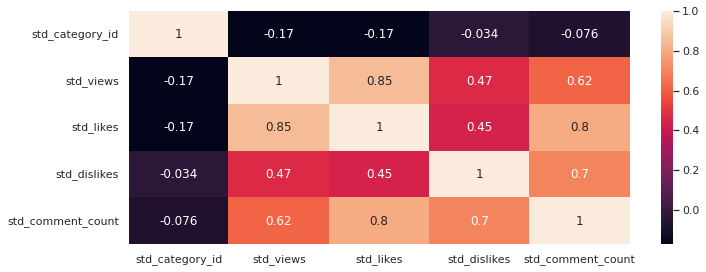

In [151]:
sns.set(rc={'figure.figsize':(10,4)})
sns.heatmap(df_pre[['std_category_id','std_views','std_likes','std_dislikes','std_comment_count']].corr(), annot=True)
#plt.savefig('fig/split train test.png')

In [152]:
x = df_pre[['std_category_id','std_likes','std_dislikes','std_comment_count']] # menggunakan semua feature kecuali target
y = df_pre['std_views']

In [153]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42) #Splitting the data into Train and Test

## Fit Simple Linear Regression Model

Fitting model to train set

In [154]:
#Fitting simple linear regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

## Predict

Predict the test set

In [155]:
pred = regressor.predict(xtest) #Predicting the views

In [156]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

## Evaluation

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [158]:
pred = regressor.predict(xtest)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, xtrain, ytrain, xtest,ytest)

Coefficients: 
 [-4.92148556e-04  8.93096666e-01  6.25438153e-01 -5.93414503e-01]
Intercept: 
 0.001218845419716041
MAE: 0.01
RMSE: 0.01
R2 score: 0.77


# Fit Ridge Regularization Model

In [159]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(xtrain, ytrain)

Ridge()

In [160]:
pred = ridge_model.predict(xtest)

print('Coefficients: \n', ridge_model.coef_) # The slope
print('Intercept: \n', ridge_model.intercept_) # The Intercept

eval_regression(ridge_model, pred, xtrain, ytrain, xtest, ytest)

Coefficients: 
 [-0.00233536  0.80087236  0.44966857 -0.39116843]
Intercept: 
 0.002409914573191894
MAE: 0.01
RMSE: 0.01
R2 score: 0.77


*italicized text*## Randomized Search


In [161]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [200, 230, 250,265, 270, 275, 290, 300, 500] # alpha
hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Ridge
ridge_model = Ridge()
clf = RandomizedSearchCV(ridge_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [162]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.02
R2 score: 0.34


# Fit Lasso Regularization Model

In [163]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(xtrain, ytrain)

Lasso()

In [164]:
pred = lasso_model.predict(xtest)
eval_regression(lasso_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


## Randomized Search

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [0.02, 0.024, 0.025, 0.026, 0.03] # alpha or lambda

hyperparameters = dict(alpha=alpha)

from sklearn.linear_model import Lasso
lasso_model = Lasso()
clf = RandomizedSearchCV(lasso_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [166]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


# Fit Elastic Net Regularization Model

In [167]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(xtrain, ytrain)

ElasticNet()

In [168]:
pred = elasticnet_model.predict(xtest)
eval_regression(elasticnet_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.03
R2 score: -0.00


Randomized Search

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

alpha = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
l1_ratio = np.arange(0, 1, 0.01)

hyperparameters = dict(alpha=alpha, l1_ratio=l1_ratio, normalize=[True,False])

from sklearn.linear_model import ElasticNet
elasticnet_model = ElasticNet()
clf = RandomizedSearchCV(elasticnet_model, hyperparameters, cv=5, random_state=42, scoring='r2')

#Fitting Model
best_model = clf.fit(xtrain, ytrain)

In [170]:
pred = best_model.predict(xtest)
eval_regression(best_model, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.01
RMSE: 0.01
R2 score: 0.77


# Fit Decision Tree Model

> Indented block



In [171]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.93


# Fit Random Forest Model

In [172]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.00
RMSE: 0.01
R2 score: 0.96


Text(0.5, 1.0, 'feature importance score')

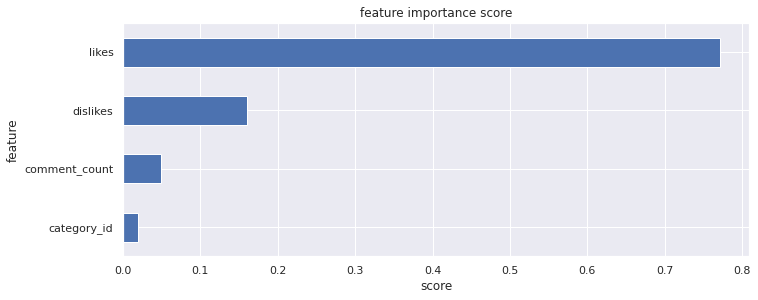

In [173]:
#make feature importance graph
X=data[['category_id','likes','dislikes','comment_count']]
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Fit Support Vector Regressor Model

In [174]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(xtrain, ytrain)
pred = svr.predict(xtest)
eval_regression(svr, pred, xtrain, ytrain, xtest, ytest)

MAE: 0.09
RMSE: 0.09
R2 score: -7.84


**The model's performance is very bad because the R2 value is below the 0 value, which is -6.85**

# Save Model

In [175]:
import pickle
pickle.dump(best_model1, open('RandomForest_model.pkl', 'wb'))

In [176]:
loaded_model = pickle.load(open('RandomForest_model.pkl', 'rb'))
result = loaded_model.score(xtest,ytest)
print('Model Score : ', str(round(result,2)*100), '%')

Model Score :  96.0 %


In [177]:
print('train accuracy : ', str(round(loaded_model.score(xtrain, ytrain),2)*100), '%')
print('test accuracy : ', str(round(loaded_model.score(xtest, ytest),2)*100), '%')

train accuracy :  99.0 %
test accuracy :  96.0 %


**The model we chose has very little tendency to overfitting, but we think it can be tolerated within normal reasonable limits, where the train accuracy has a value of 99,38% and the test accuracy has a value of 96,26%.**

# Conclusion

**Based on the experiments that have been carried out, there are several models that are good for determining the views of Youtube videos** </br>
* Random Forest with MAE 0.00, RMSE 0.01, and R2 of 0.96 makes Random Forest the best model so far
* Decision Tree is the second best sequence model after Random Forest with a slightly smaller R2 value of 0.92
* Ridge Regularization is the next best model with MAE values of 0.01, RMSE 0.01, and R2 of 0.77
* a very influential feature is the number of likes and dislikes of a video